# Survival analysis on LOG_S_1.0mm small dataset

### Imports

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import (
    cross_val_predict,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (
    FunctionTransformer,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)

### Initial glance on data

In [78]:
data = pd.read_excel('LOG_S_1.0mm.xlsx', sheet_name='Sheet 1')
data.head()

,A_LOG_1.0S_FO_10Percentile,A_LOG_1.0S_FO_90Percentile,A_LOG_1.0S_FO_Energy,A_LOG_1.0S_FO_Entropy,A_LOG_1.0S_FO_IQR,A_LOG_1.0S_FO_Kurtosis,A_LOG_1.0S_FO_Maximum,A_LOG_1.0S_FO_Mean,A_LOG_1.0S_FO_MAD,A_LOG_1.0S_FO_Median,...,E_shape_MajorAxis,E_shape_Maximum2DDiameterColumn,E_shape_Maximum2DDiameterRow,E_shape_Maximum2DDiameterSlice,E_shape_Maximum3DDiameter,E_shape_Sphericity,E_shape_SurfaceArea,E_shape_SurfaceVolumeRatio,censor,time
0,-112.993087,34.278236,1.497499e+07,1.950718,78.772847,2.963165,125.661385,-36.069763,45.916473,-32.176239,...,56.413789,110.143944,105.702865,111.731201,47.445347,0.295952,22991.047470,0.435628,1,4.734247
1,-91.982840,19.046037,1.456415e+06,1.733513,45.578664,6.254949,191.171707,-23.584620,35.662827,-11.017938,...,31.705678,47.186476,42.071600,48.412302,26.403203,0.447198,5349.092830,0.486225,1,18.345205
2,-24.633341,7.849291,4.955951e+05,0.966132,13.906203,8.346409,32.401775,-6.966859,10.458822,-4.591255,...,44.359603,41.168907,50.109743,56.818000,34.330462,0.417301,7627.193971,0.451720,1,10.586301
3,-27.706317,15.834357,7.741525e+06,1.168238,17.453013,11.841962,111.435387,-4.398507,14.461138,-1.749925,...,62.334907,69.090980,78.631173,78.631173,56.161281,0.567011,17162.509940,0.190129,1,20.712329
4,-195.595828,99.832056,3.896654e+08,2.882933,96.341311,7.102594,483.333252,-28.100289,91.166116,-7.814033,...,58.462737,60.018560,58.283554,62.152361,47.212345,0.607316,12445.462710,0.201418,1,10.356164


In [79]:
import lifelines

### Train Test Split

In [80]:
train_df, test_df = train_test_split(data, random_state=123)
train_df.head()

,A_LOG_1.0S_FO_10Percentile,A_LOG_1.0S_FO_90Percentile,A_LOG_1.0S_FO_Energy,A_LOG_1.0S_FO_Entropy,A_LOG_1.0S_FO_IQR,A_LOG_1.0S_FO_Kurtosis,A_LOG_1.0S_FO_Maximum,A_LOG_1.0S_FO_Mean,A_LOG_1.0S_FO_MAD,A_LOG_1.0S_FO_Median,...,E_shape_MajorAxis,E_shape_Maximum2DDiameterColumn,E_shape_Maximum2DDiameterRow,E_shape_Maximum2DDiameterSlice,E_shape_Maximum3DDiameter,E_shape_Sphericity,E_shape_SurfaceArea,E_shape_SurfaceVolumeRatio,censor,time
23,-136.326178,28.534787,5.929321e+07,2.146554,84.596703,5.674135,200.210709,-49.659627,53.198603,-39.628033,...,42.505107,51.677153,52.402224,53.707476,33.780387,0.269664,6493.473258,0.942441,1,47.309589
9,-72.800306,40.854950,3.109927e+07,1.711837,56.870411,4.237524,166.760513,-12.856040,36.687428,-7.558704,...,73.050068,114.147811,105.541063,115.011659,61.368132,0.440469,37824.603640,0.187054,1,14.728767
75,-164.492950,40.678913,3.857270e+08,2.429253,96.290200,5.138702,268.316315,-50.682658,65.163284,-35.914999,...,63.648332,77.259264,76.748082,83.593809,59.303064,0.314814,26047.684900,0.373044,1,11.243836
116,-307.195953,73.882935,6.998296e+07,3.312063,198.950063,4.621181,407.875977,-112.185588,123.633278,-93.440277,...,69.000674,71.245140,67.843479,72.123861,53.321172,0.466786,19873.790060,0.236542,0,9.271233
115,-140.765985,36.945937,1.381109e+08,2.259325,87.466111,4.180886,250.706039,-45.650616,56.254705,-37.681164,...,75.881498,97.264657,89.431930,104.682305,58.167516,0.426495,31576.815380,0.214868,1,5.030137


In [81]:
train_df.shape

(89, 430)

In [82]:
train_df["censor"].value_counts()

1    69
0    20
Name: censor, dtype: int64

In [83]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 23 to 109
Columns: 430 entries, A_LOG_1.0S_FO_10Percentile to time
dtypes: float64(424), int64(6)
memory usage: 299.7 KB


### Preprocessing 

In [84]:
passthrough_features = ["time"]
# don't want to scale tenure since it will be convenient to keep it in its original units of months.
target_column = ["censor"]

In [85]:
numeric_features = list(
    set(train_df.columns)
    - set(passthrough_features)
    - set(target_column)
)

In [86]:
# Using StandardScaler() to standardize numrical features
# We don't have categoritcal features
preprocessing_final = make_column_transformer(
    (
        FunctionTransformer(lambda x: x == 1),
        target_column,
    ), 
    ("passthrough", passthrough_features),
    (StandardScaler(), numeric_features)
)

In [87]:
preprocessing_final.fit(train_df);

### Get the column names of the columns created by the column transformer.

In [88]:
new_columns = (
    target_column
    + passthrough_features
    + numeric_features
)

In [89]:
train_df_surv = pd.DataFrame(
    preprocessing_final.transform(train_df), index=train_df.index, columns=new_columns
)
test_df_surv = pd.DataFrame(
    preprocessing_final.transform(test_df), index=test_df.index, columns=new_columns
)

In [90]:
train_df_surv.head()

,censor,time,N_LOG_1.0S_GLCM_JA,T_LOG_1.0S_GLSZM_SALGLE,E_LOG_1.0S_GLSZM_SAE,N_shape_SurfaceArea,T_LOG_1.0S_FO_Skewness,T_LOG_1.0S_FO_Energy,T_LOG_1.0S_GLRLM_SRHGLE,T_LOG_1.0S_FO_Entropy,...,A_LOG_1.0S_NGTDM_Coarseness,N_LOG_1.0S_FO_10Percentile,N_LOG_1.0S_GLSZM_HGLZE,A_LOG_1.0S_GLCM_SE,A_LOG_1.0S_FO_TE,E_LOG_1.0S_NGTDM_Complexity,T_LOG_1.0S_GLDM_DV,A_LOG_1.0S_GLRLM_RE,A_shape_Maximum2DDiameterSlice,T_LOG_1.0S_FO_Variance
23,1.0,47.309589,-0.003345,-0.537238,-0.101096,-0.529196,-0.648566,-0.210620,-0.069552,0.169894,...,-0.266033,-0.180555,-0.209015,0.316880,-0.385739,-0.029625,2.057442,0.157414,0.402288,-0.186263
9,1.0,14.728767,-0.367806,-0.034233,0.289555,-0.000025,-0.397175,-0.243197,-0.449048,-0.518355,...,-0.480265,0.136767,-0.279798,-0.360721,-0.234693,-0.335688,0.200735,-0.243563,0.021448,-0.335192
75,1.0,11.243836,0.606227,-0.643614,-1.653106,1.774205,-0.683591,0.125308,0.253589,0.515551,...,-0.581105,-0.164287,0.159634,0.610658,0.494235,-0.292262,0.368066,0.583578,0.971441,-0.066811
116,0.0,9.271233,1.972629,-0.555430,-0.204873,-0.904473,0.198206,-0.202469,1.290834,1.868426,...,0.770154,-1.706635,1.262994,1.595650,0.088095,-0.279239,-2.314638,1.237680,-1.030492,1.081906
115,1.0,5.030137,0.261193,-0.510896,-0.154223,1.497561,-0.112099,-0.128730,-0.165557,0.296566,...,-0.497118,-0.589422,0.018727,0.348508,0.638641,-0.330668,-0.170805,0.282769,0.535119,-0.166716


### Kaplan-Meier survival curve

#### I started with a model called KaplanMeierFitter.
#### I used this model to estimate the survival function. 

#### This model requires two columns: time and censor.

In [91]:
kmf = lifelines.KaplanMeierFitter()
kmf.fit(train_df_surv["time"], train_df_surv["censor"]);

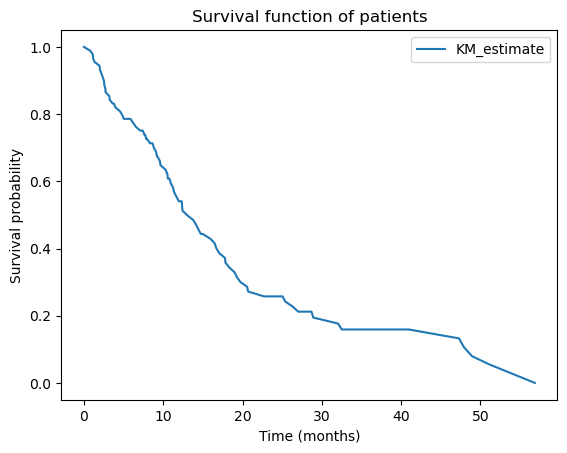

In [92]:
kmf.survival_function_.plot();
plt.title("Survival function of patients")
plt.xlabel("Time (months)")
plt.ylabel("Survival probability");

##### Average survival time

In [93]:
train_df_surv["time"].mean()

15.198276127786515

##### Average survival time for patients alive

In [94]:
train_df_surv.query("censor == 1.0")["time"].mean()

14.384752829666665

##### Average survival time for patients passed away

In [95]:
train_df_surv.query("censor == 0.0")["time"].mean()

18.004931506300004

#### Survial function with error bar

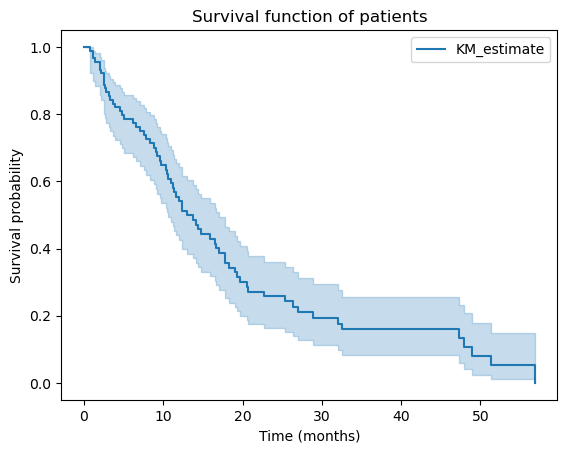

In [96]:
kmf.plot()
plt.title("Survival function of patients")
plt.xlabel("Time (months)")
plt.ylabel("Survival probability");

### Cox proportional hazards model

In [97]:
cph = lifelines.CoxPHFitter()

In [98]:
cph = lifelines.CoxPHFitter(penalizer=0.1)
cph.fit(train_df_surv, duration_col="time", event_col="censor");

#### Coefficients learned by the model and start interpreting

In [99]:
cph_params = pd.DataFrame(cph.params_).sort_values(by="coef", ascending=False)
cph_params

,coef
covariate,
Age,0.550230
A_shape_Maximum2DDiameterSlice,0.411338
N_LOG_1.0S_GLCM_Correlation,0.328124
T_LOG_1.0S_GLSZM_SZNUN,0.266966
E_LOG_1.0S_GLCM_CP,0.260755
...,...
E_LOG_1.0S_FO_90Percentile,-0.344341
E_LOG_1.0S_GLSZM_SALGLE,-0.349753
N_LOG_1.0S_GLSZM_SAE,-0.363663


In [100]:
coefficients = cph.summary['coef']

### Top 10 "positive" features: The larger these variables are, the less likely the patient are going to survive longer. (Bad feature)

In [101]:
top_positive_features = coefficients[coefficients > 0].nlargest(10).index

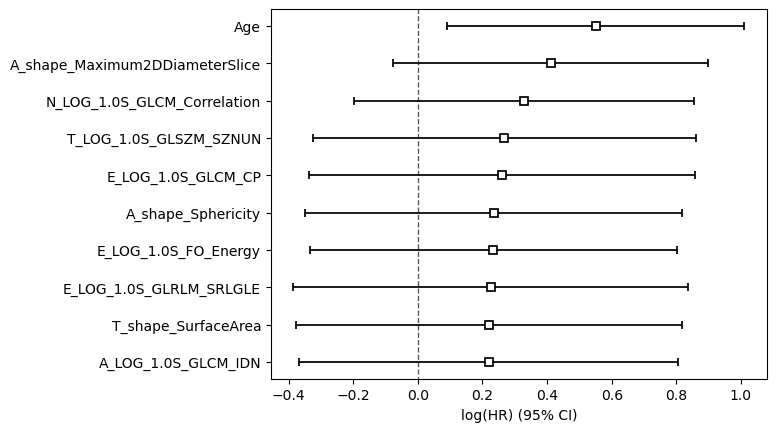

<Figure size 1000x1200 with 0 Axes>

In [102]:
cph.plot(top_positive_features)
plt.figure(figsize=(10, 12))
plt.show()

### Top 10 "negative" features: The larger these variables are, the more likely the patient are going to survive longer. (Good feature)

In [103]:
top_negative_features = coefficients[coefficients < 0].nsmallest(10).index

<AxesSubplot: xlabel='log(HR) (95% CI)'>

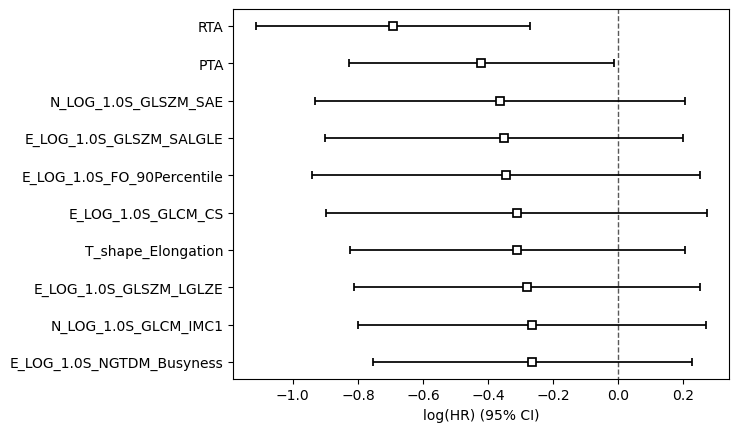

In [104]:
cph.plot(top_negative_features)

## Prediction

#### I hope to know the quality of my model

#### I used concordance-index, also known as the c-index to evaluate my model. I chose to use it because it is censoring-sensitive.

##### From the documentation:
**0.5** is the expected result from random predictions, <br />
**1.0** is perfect concordance <br />
**0.0** is perfect anti-concordance

### On training set:

In [105]:
cph.score(train_df_surv, scoring_method="concordance_index")

0.9493427380570696

##### This indicates that the model has an excellent fit to the training data.

### On testing set:

In [106]:
cph.score(test_df_surv, scoring_method="concordance_index")

0.6609686609686609

##### This value is significantly lower than the training score, indicating that the model's performance drops when predicting on unseen data.

### The large discrepancy between the training and testing scores suggests that the model might be **overfitting** to the training data.

### More actions could be taken to address this overfitting issue. One measure I could think of is to increase the sample size. Now we have only about 300 observations, which is probably too small for training a good model.